# Exercise 4.9 Data Clean Up and Visualizations

## Contents

### 01 Importing Libraries

### 02 Importing Data

### 03 Cleaning Data

### 04 Creating Visuals

### 05 Exporting Dataframes and Visuals

## 01 Importing Libraries

In [21]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02 Importing Data

In [23]:
#create path
path = r'C:\\Users\\samac\\Instacart Basket Analysis'

In [29]:
#importing final_ords_products_all_will_column_derivations
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_orders_products_all_with_column_derivations'))

## 03 Cleaning Data

Throughout this exercise it has been determined that there are some outliers in the 'prices' field that need to be addressed. This section will find those outliers and turn them into null values.

<Axes: xlabel='prices', ylabel='prices'>

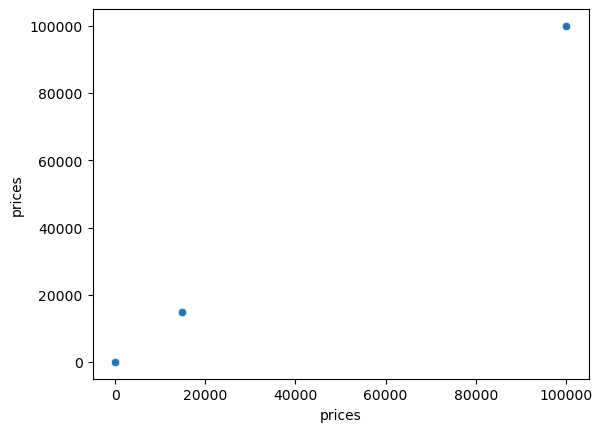

In [33]:
#creating scatterplot to see distribution of prices
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

In [37]:
#checking prices over $100
ords_prods_all.loc[ords_prods_all['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,days_since_prior_order_median,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busiest days,Average orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busiest days,Average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [41]:
#turning outliers into NaN
ords_prods_all.loc[ords_prods_all['prices'] >100, 'prices'] = np.nan

In [45]:
#checking new max price
ords_prods_all['prices'].max()

25.0

## 04 Creating Visuals

In this section visuals are being created that will help answer the key questions put forth in the project brief

### 01 Measuring Busyness by Day of the Week

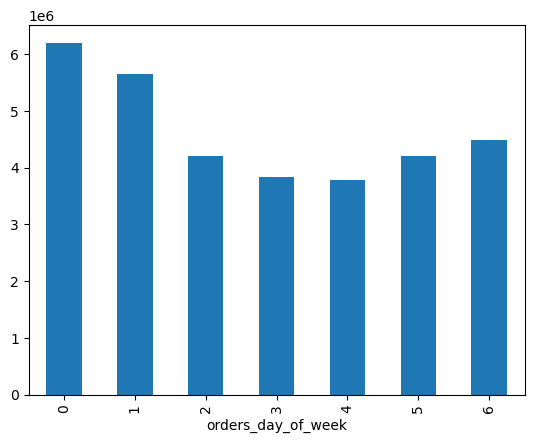

In [52]:
#creating a bar chart that measures the amount of orders in each day of the week
bar_order_dow = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

### 02 Measuring Busyness by Hour of the Day

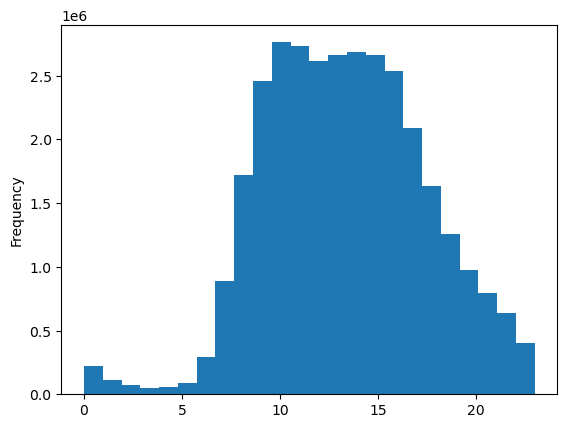

In [54]:
#creating a histogram that measures the amount of orders in each day of the week
hist_order_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

### 03 Creating a Small Sample Size

In order to save on memory, a smaller sample size needs to be used when creating a line chart. That sample size will be created in this section

In [58]:
#creating list to randomize data subset
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [60]:
#creating big and small sample sizes
big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [62]:
#checking length of ords_prods_all
len(ords_prods_all)

32404859

In [64]:
#checking length of big and small combined
len(big) + len(small)

32404859

### 04 Measuring Priciness by Hour of the Day

In [66]:
#simplifying small dataframe to include only necessary columns
df_price_hour = small[['order_hour_of_day','prices']]

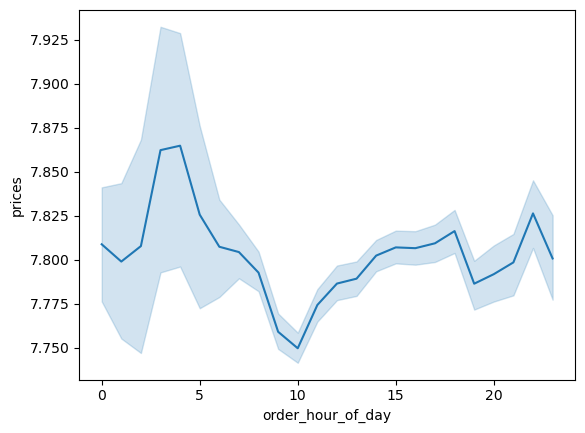

In [68]:
#creating line chart that measures average price of each orders across all hours of the day
line_price_hour = sns.lineplot(data = df_price_hour, x = 'order_hour_of_day',y = 'prices')

### 05 Measuring Loyalty of Customers

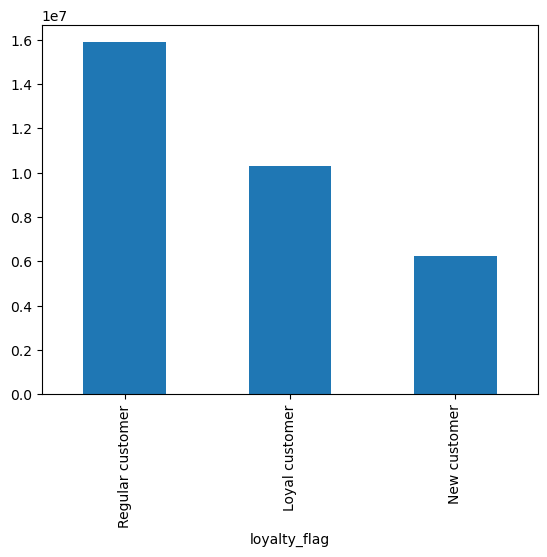

In [71]:
#creating bar chart that measures how many users fall into each loyalty category
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

### 06 Measuring Relation Between Age and Number of Dependants

In [73]:
#simlpifying small data frame to include only necessary columns
df_age_dependants = small[['age','n_dependants']]

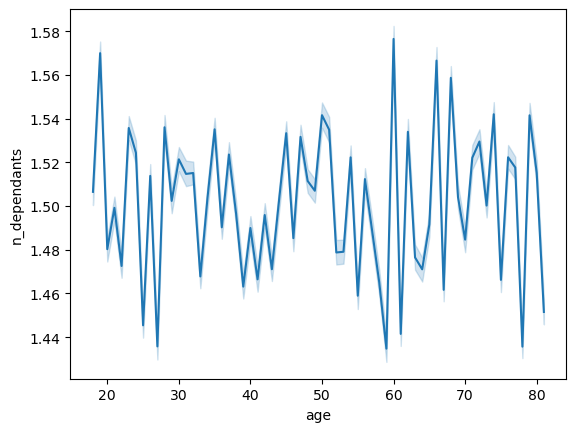

In [75]:
#creating line chart that measures number of dependants across all ages
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'n_dependants')

### 07 Measuring Relation Between Age and Income

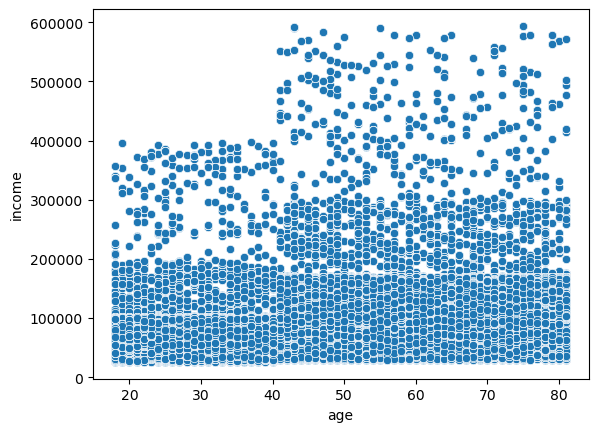

In [77]:
#creating scatterplot that measures relationship between age and income
scat_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_all)

## 05 Exporting Dataframe and Visuals

In [48]:
#Exporting ords_prods_all
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_orders_products_all_4_9_complete.pkl'))

In [79]:
#exporting bar_order_dow
bar_order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_bar_order_dow.png'))

In [81]:
#exporting hist_order_hour
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_hist_order_hour_frequency.png'))

In [83]:
#exporting line_price_hour
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_line_price_hour.png'))

In [85]:
#exporting bar_loyalty
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_bar_loyalty.png'))

In [87]:
#exporting line_age_dependants
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_line_age_dependants.png'))

In [89]:
#exporting scat_age_income
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'final_scat_age_income.png'))